In [1]:
import os
import warnings

import numpy as np
import mpl_toolkits
import matplotlib.pyplot as plt

import fitsio
from desitarget.targetmask import desi_mask, bgs_mask
from desiutil.plots import init_sky, plot_healpix_map, plot_grid_map, plot_sky_circles, plot_sky_binned, prepare_data

%matplotlib inline

In [2]:
path = '/Users/kevinnapier/research/desi/'
targfile = os.path.join(path, 'targets-dr3.1-withnobs.fits')
#ii = fitsio.FITS(targfile)
#ii[1]

In [3]:
def depth2mag(indepth):
    return 22.5-2.5*np.log10(5/np.sqrt(indepth))

In [4]:
def skymap(column, maskname, targetlist):
    targets = targetlist
    plt.figure(figsize=(8, 4*len(targets)))
    for number, obj in enumerate(targets):
        cut = np.where(((dd[column] & maskname.mask(obj)) != 0)* rr * gg * zz)[0] #
        plt.subplot(len(targets), 1, number+1)
        basemap = init_sky(galactic_plane_color='k');
        plot_sky_binned(dd['RA'][cut], dd['DEC'][cut], verbose=False, 
                        clip_lo='!1', plot_type='healpix', cmap='jet', 
                        label=r'{}s (targets/deg$^2$)'.format(obj), 
                        basemap=basemap);
    plt.tight_layout()

In [5]:
def rawplots(bands, cuts, letter, stat):
    plt.figure(figsize=(8, 4*len(bands)))
    for number, band in enumerate(bands):
        plt.subplot(len(bands), 1, number+1)
        basemap = init_sky(galactic_plane_color='k');
        plot_sky_binned(dd['RA'][cuts[number]], dd['DEC'][cuts[number]], verbose=False, 
                        clip_lo='!1',plot_type='healpix', cmap='jet', 
                        label=r'{}-band {}'.format(letter[number], stat), basemap=basemap, data=bands[number]);
    plt.tight_layout()

In [6]:
dd = fitsio.read(targfile, ext=1, columns=['RA','DEC','DESI_TARGET','BGS_TARGET',
                                           'DECAM_NOBS', 'DECAM_DEPTH', 'DECAM_GALDEPTH'])

nobsg = dd['DECAM_NOBS'][:, 1] 
nobsr = dd['DECAM_NOBS'][:, 2] 
nobsz = dd['DECAM_NOBS'][:, 4] 

depthg = dd['DECAM_DEPTH'][:, 1] 
depthr = dd['DECAM_DEPTH'][:, 2] 
depthz = dd['DECAM_DEPTH'][:, 4]

galdepthg = dd['DECAM_GALDEPTH'][:, 1] 
galdepthr = dd['DECAM_GALDEPTH'][:, 2] 
galdepthz = dd['DECAM_GALDEPTH'][:, 4]

In [7]:
nobsgcuts = np.where(nobsg >= 1)[0]
nobsrcuts = np.where(nobsr >= 1)[0]
nobszcuts = np.where(nobsz >= 1)[0]

depthgcuts = np.where(depthg >= 1)[0]
depthrcuts = np.where(depthr >= 1)[0]
depthzcuts = np.where(depthz >= 1)[0]

galdepthgcuts = np.where(galdepthg >= 1)[0]
galdepthrcuts = np.where(galdepthr >= 1)[0]
galdepthzcuts = np.where(galdepthz >= 1)[0]

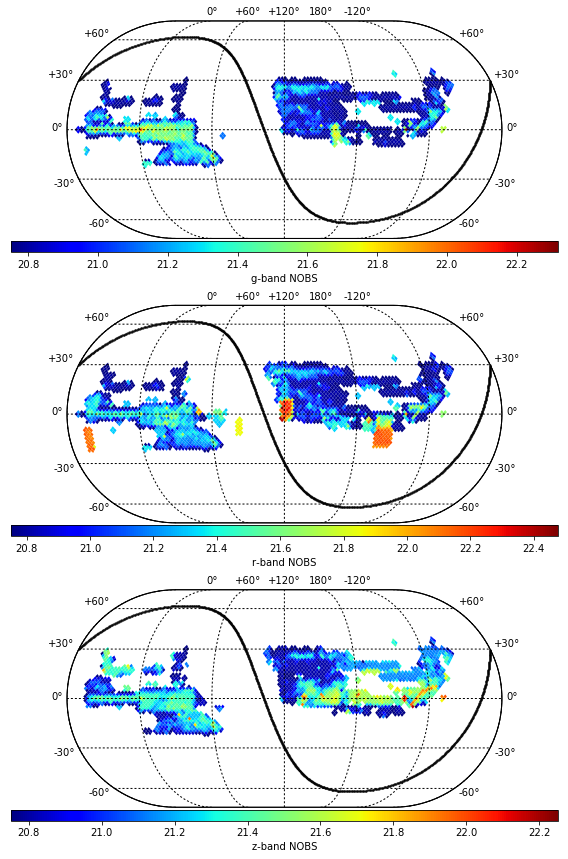

In [38]:
bands = [depth2mag(nobsg[nobsgcuts]),depth2mag(nobsr[nobsrcuts]),depth2mag(nobsz[nobszcuts])]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    rawplots(bands, [nobsgcuts, nobsrcuts, nobszcuts], 
             ['g','r','z'], 'NOBS')
    plt.show()

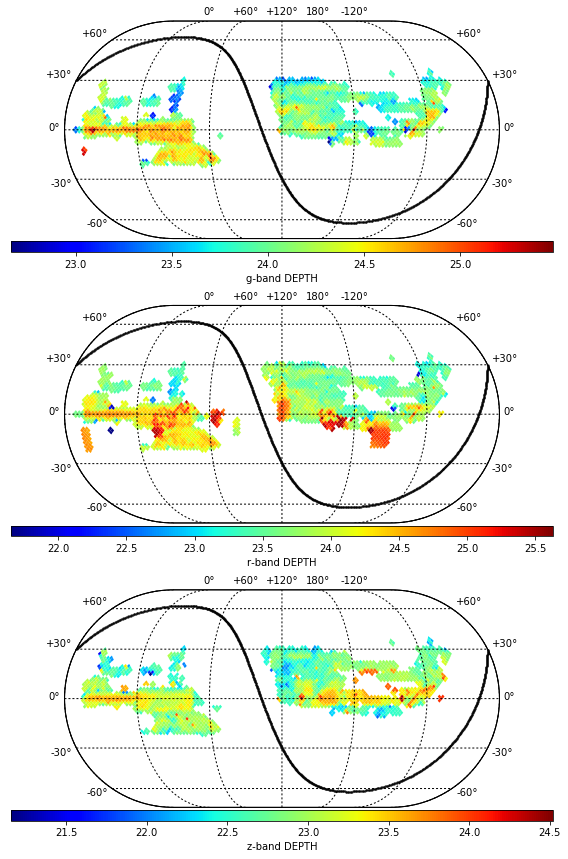

In [39]:
bands = [depth2mag(depthg[depthgcuts]),depth2mag(depthr[depthrcuts]),depth2mag(depthz[depthzcuts])]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    rawplots(bands, [depthgcuts, depthrcuts, depthzcuts], 
             ['g','r','z'], 'DEPTH')
    plt.show()

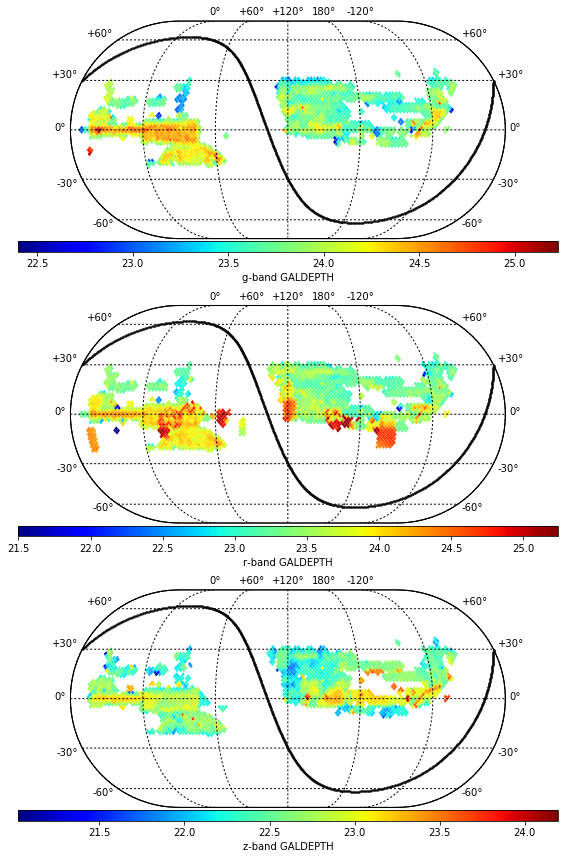

In [40]:
bands = [depth2mag(galdepthg[galdepthgcuts]),depth2mag(galdepthr[galdepthrcuts]),depth2mag(galdepthz[galdepthzcuts])]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    rawplots(bands, [galdepthgcuts, galdepthrcuts, galdepthzcuts], 
             ['g','r','z'], 'GALDEPTH')
    plt.show()

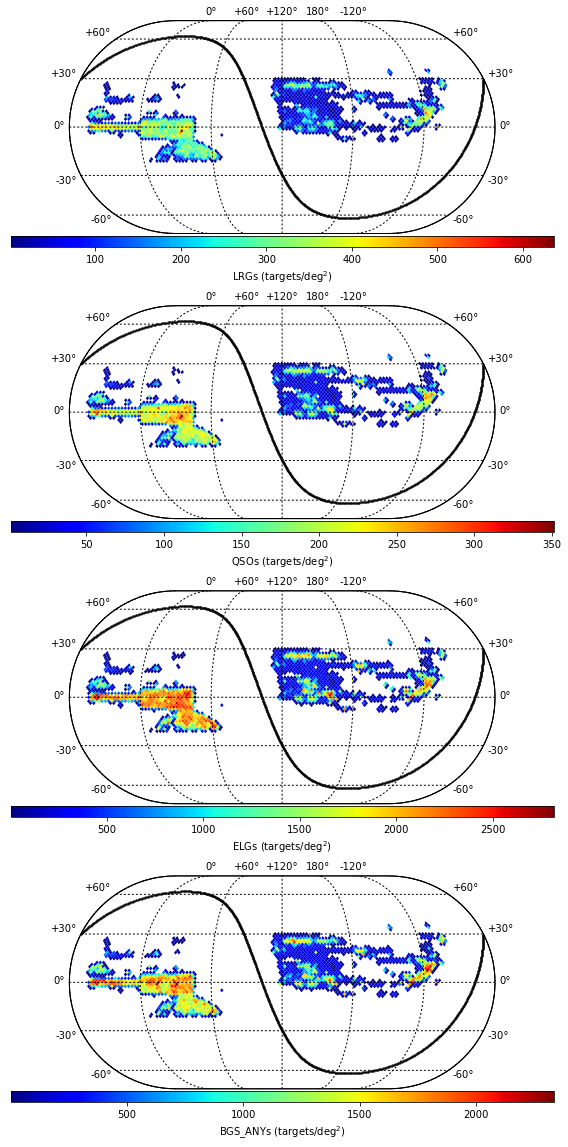

In [187]:
objtype = ['LRG', 'QSO', 'ELG', 'BGS_ANY']

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    skymap('DESI_TARGET', desi_mask, objtype)

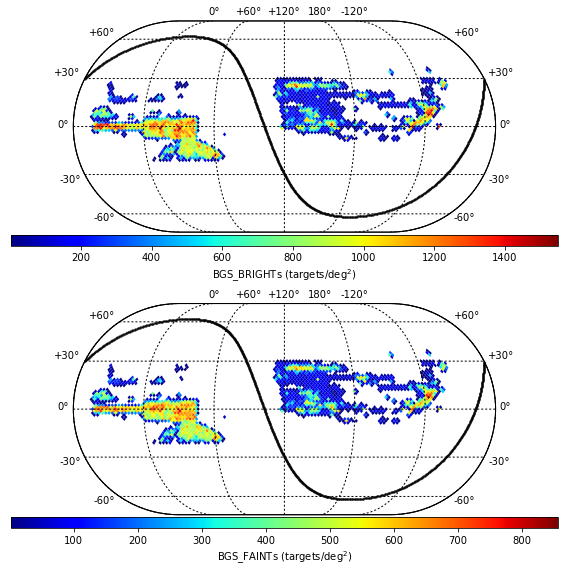

In [176]:
objtype = ['BGS_BRIGHT', 'BGS_FAINT']

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    skymap('BGS_TARGET', bgs_mask, objtype)

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


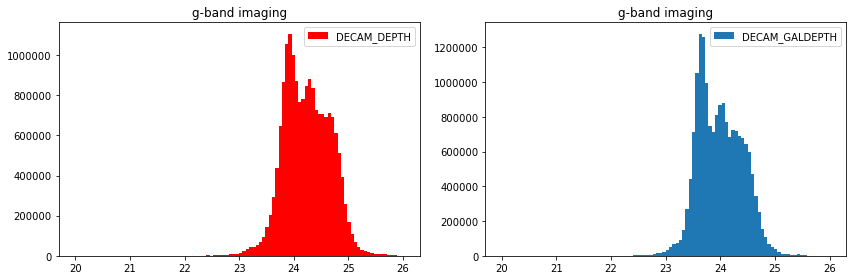

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('g-band imaging')
plt.hist(depth2mag(depthg), bins=100, range=(20, 26), label='DECAM_DEPTH', color='red');
plt.legend()
plt.subplot(1,2,2)
plt.title('g-band imaging')
plt.hist(depth2mag(galdepthg), bins=100, range=(20, 26), label='DECAM_GALDEPTH');
plt.legend()
plt.tight_layout()

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


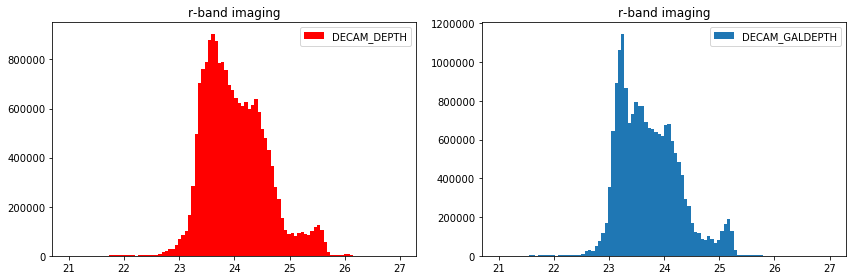

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('r-band imaging')
plt.hist(depth2mag(depthr), bins=100, range=(21, 27), label='DECAM_DEPTH', color='red');
plt.legend()
plt.subplot(1,2,2)
plt.title('r-band imaging')
plt.hist(depth2mag(galdepthr), bins=100, range=(21, 27), label='DECAM_GALDEPTH');
plt.legend()
plt.tight_layout()

/usr/local/anaconda/envs/desi/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


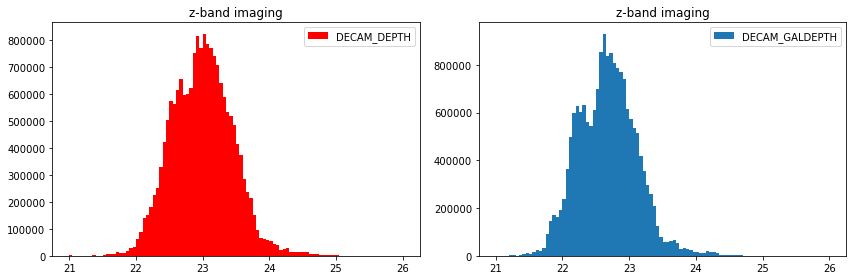

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('z-band imaging')
plt.hist(depth2mag(depthz), bins=100, range=(21, 26), label='DECAM_DEPTH', color='red');
plt.legend()
plt.subplot(1,2,2)
plt.title('z-band imaging')
plt.hist(depth2mag(galdepthz), bins=100, range=(21, 26), label='DECAM_GALDEPTH');
plt.legend()
plt.tight_layout()